# Product Recommendation
Subject: BADS 7205 - CRM Analytics and Intelligence

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
import matplotlib as mpl

C:\Users\User\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data clensing

In [2]:
# Import file
data = pd.read_csv("C:/Users/User/Desktop/CRM/Customer Survey.csv")
print(data.shape)
data.head(10)

(44, 62)


,Student,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
5,6,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,7,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
7,8,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
8,9,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย
9,10,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย


In [3]:
#remove first column
renamedata = data.iloc[1:,1:].reset_index(drop=True).rename_axis('student').copy()
print(renamedata.shape)
renamedata.head(10)

(43, 61)


,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
student,,,,,,,,,,,,,,,,,,,,,
0,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
1,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
2,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
3,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
4,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
5,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
6,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
7,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย
8,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย


In [4]:
renamedata.melt()['value'].value_counts(dropna=False)

ไม่เคย    1600
เคย       1017
NaN          6
Name: value, dtype: int64

In [5]:
# Impute NaN เป็น ไม่เคย
renamedata.fillna('ไม่เคย', inplace=True)
renamedata.isna().any().sum()
renamedata.melt()['value'].value_counts(dropna=False)

ไม่เคย    1606
เคย       1017
Name: value, dtype: int64

In [6]:
#เปลี่ยนค่า เคย = 1 , ไม่เคย = 0
renamedata.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
renamedata.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
student,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
1,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
4,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,1
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
8,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


In [7]:
#list column name
my_culoumn = renamedata.columns.values.tolist()
print(my_culoumn)
#มีชื่อคอลัมน์ซ้ำกันคือ เครื่องย่อยเศษอาหาร.1

['จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie อวกาศ', 'แม่โขง', 'Botox', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน', 'หลอดไฟเปลี่ยนสีได้', 'คอร์ส bikini wax', 'เก้าอี้นวดไฟฟ้า', 'ต้นไม้ประดับห้อง', 'หมอนข้าง', 'ตาชั่ง ', 'คอร์สโบท็อกกราม', 'แสงโสม', 'กะหรี่(ปั๊บ)', 'Lego', 'แฟน ที่แปลว่าพัดลม', 'ยาดอง', 'ชุดนอนไม่ได้นอน', 'ที่ยกน้ำหนัก (Dumbell)', 'เครื่องดูดฝุ่นอัตโนมัติ (robot)', 'เนื้อวากิล', 'หมูแดดเดียว', 'drone', 'เครื่องย่อยเศษอาหาร', 'เสื้อซีทรู', 'ไพ่ยิปซี', 'เนื้อย่าง', 'เครื่องทำลายเอกสาร', 'กระเป๋า', 'ชาบู', 'Surfskate', 'Board game', 'เครื่องย่อยเศษอาหาร.1', 'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์', 'ไฟอัจฉริยะ', 'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง', 'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง', 'น้องหมา', 'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา', 'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้าวขาหมูคากิคาจักออนไลน์', 'ถั่งเช่า', 'หมอนสุขภาพสำหรับคนนอนไม่หลับ', 'อาหารแมวคลีนเพื่อสุขภาพลดหุ่น', 'น้ำส้มดีโด้', 'Software ถ

In [8]:
#Drop column name ที่ซ้ำกัน
renamedata.drop('เครื่องย่อยเศษอาหาร.1',axis=1, inplace=True)
my_culoumn = renamedata.columns.values.tolist()
print(my_culoumn)

['จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie อวกาศ', 'แม่โขง', 'Botox', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน', 'หลอดไฟเปลี่ยนสีได้', 'คอร์ส bikini wax', 'เก้าอี้นวดไฟฟ้า', 'ต้นไม้ประดับห้อง', 'หมอนข้าง', 'ตาชั่ง ', 'คอร์สโบท็อกกราม', 'แสงโสม', 'กะหรี่(ปั๊บ)', 'Lego', 'แฟน ที่แปลว่าพัดลม', 'ยาดอง', 'ชุดนอนไม่ได้นอน', 'ที่ยกน้ำหนัก (Dumbell)', 'เครื่องดูดฝุ่นอัตโนมัติ (robot)', 'เนื้อวากิล', 'หมูแดดเดียว', 'drone', 'เครื่องย่อยเศษอาหาร', 'เสื้อซีทรู', 'ไพ่ยิปซี', 'เนื้อย่าง', 'เครื่องทำลายเอกสาร', 'กระเป๋า', 'ชาบู', 'Surfskate', 'Board game', 'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์', 'ไฟอัจฉริยะ', 'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง', 'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง', 'น้องหมา', 'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา', 'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้าวขาหมูคากิคาจักออนไลน์', 'ถั่งเช่า', 'หมอนสุขภาพสำหรับคนนอนไม่หลับ', 'อาหารแมวคลีนเพื่อสุขภาพลดหุ่น', 'น้ำส้มดีโด้', 'Software ถูกลิขสิทธิ์', 'ครีมกันแดด

In [9]:
print(renamedata.shape)
renamedata.head(10)

(43, 60)


,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
student,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
1,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
4,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,1
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
8,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


# Profile Data

In [10]:
renamedata.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
ครีมกันแดด,43.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
กระเป๋า,43.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
ชาบู,43.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
โรตี,43.0,0.953488,0.213083,0.0,1.0,1.0,1.0,1.0
กะหรี่(ปั๊บ),43.0,0.930233,0.257770,0.0,1.0,1.0,1.0,1.0
เม็ดมะม่วงหิมพานต์,43.0,0.906977,0.293903,0.0,1.0,1.0,1.0,1.0
หมอนข้าง,43.0,0.860465,0.350605,0.0,1.0,1.0,1.0,1.0
แฟน ที่แปลว่าพัดลม,43.0,0.813953,0.393750,0.0,1.0,1.0,1.0,1.0
หมูแดดเดียว,43.0,0.790698,0.411625,0.0,1.0,1.0,1.0,1.0
Software ถูกลิขสิทธิ์,43.0,0.767442,0.427463,0.0,1.0,1.0,1.0,1.0


# Plot Graph

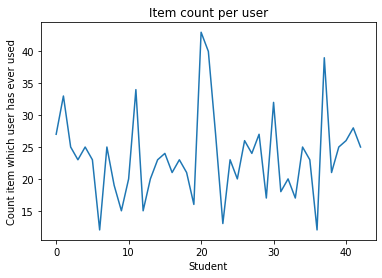

In [11]:
plt.plot(renamedata.sum(axis = 1))
plt.title('Item count per user')
plt.ylabel('Count item which user has ever used')
plt.xlabel('Student')
plt.show()


In [12]:
item=renamedata.sum(axis = 0)
print(item)

จักรยานเสือภูเขา                   16
คอลลาเจน                           23
Brownie อวกาศ                       5
แม่โขง                             14
Botox                               9
กัญชา                               8
กัญชง                               4
เครื่องวัดความดัน                  17
หลอดไฟเปลี่ยนสีได้                 10
คอร์ส bikini wax                    3
เก้าอี้นวดไฟฟ้า                     5
ต้นไม้ประดับห้อง                   31
หมอนข้าง                           37
ตาชั่ง                             30
คอร์สโบท็อกกราม                     5
แสงโสม                             16
กะหรี่(ปั๊บ)                       40
Lego                               26
แฟน ที่แปลว่าพัดลม                 35
ยาดอง                              11
ชุดนอนไม่ได้นอน                     7
ที่ยกน้ำหนัก (Dumbell)             27
เครื่องดูดฝุ่นอัตโนมัติ (robot)    23
เนื้อวากิล                         28
หมูแดดเดียว                        34
drone                               5
เครื่องย่อยเ

# Market Basket Analysis

In [13]:
# calculate frequent itemsets
frequency = apriori(renamedata, min_support=0.5, use_colnames=True)
print(frequency.shape)
frequency.head()

(4567, 2)


,support,itemsets
0,0.534884,(คอลลาเจน)
1,0.720930,(ต้นไม้ประดับห้อง)
2,0.860465,(หมอนข้าง)
3,0.697674,(ตาชั่ง )
4,0.930233,(กะหรี่(ปั๊บ))


In [14]:
# generate association rules
rules = association_rules(frequency, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(5)

(253008, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80767,"(เนื้อย่าง, กระเป๋า, หมูแดดเดียว)","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, หมอนข้าง)",0.604651,0.55814,0.511628,0.846154,1.516026,0.174148,2.872093
216639,"(หมูแดดเดียว, เนื้อย่าง, ชาบู)","(โรตี, เม็ดมะม่วงหิมพานต์, หมอนข้าง, เนื้อวากิ...",0.604651,0.55814,0.511628,0.846154,1.516026,0.174148,2.872093
217403,"(เนื้อย่าง, ครีมกันแดด, หมูแดดเดียว)","(โรตี, เม็ดมะม่วงหิมพานต์, หมอนข้าง, เนื้อวากิ...",0.604651,0.55814,0.511628,0.846154,1.516026,0.174148,2.872093
81133,"(เนื้อย่าง, โรตี, หมูแดดเดียว)","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, หมอนข้าง)",0.604651,0.55814,0.511628,0.846154,1.516026,0.174148,2.872093
154493,"(เนื้อย่าง, โรตี, หมูแดดเดียว)","(เนื้อวากิล, ครีมกันแดด, เม็ดมะม่วงหิมพานต์, ห...",0.604651,0.55814,0.511628,0.846154,1.516026,0.174148,2.872093


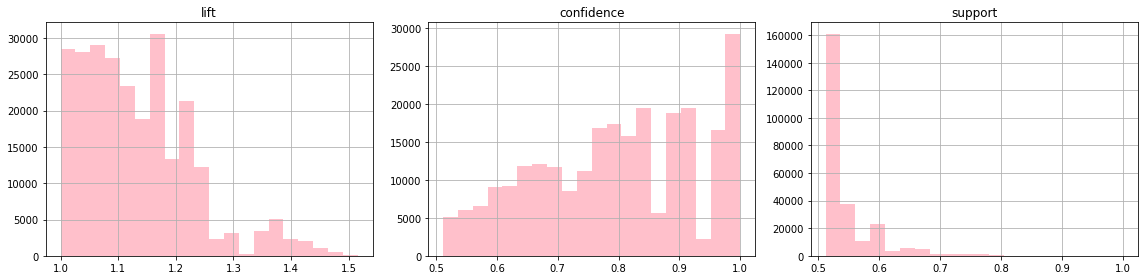

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='Pink')
    ax.set_title(var)
plt.show()

# Visualize Rules of 1 Itemsets

In [16]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)

(46, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,(เนื้อย่าง),(เนื้อวากิล),0.697674,0.651163,0.627907,0.900000,1.382143,0.173607,3.488372
153,(เนื้อวากิล),(เนื้อย่าง),0.651163,0.697674,0.627907,0.964286,1.382143,0.173607,8.465116
16,(Lego),(ต้นไม้ประดับห้อง),0.604651,0.720930,0.534884,0.884615,1.227047,0.098972,2.418605
17,(ต้นไม้ประดับห้อง),(Lego),0.720930,0.604651,0.534884,0.741935,1.227047,0.098972,1.531977
150,(เนื้อวากิล),(หมูแดดเดียว),0.651163,0.790698,0.581395,0.892857,1.129202,0.066522,1.953488
151,(หมูแดดเดียว),(เนื้อวากิล),0.790698,0.651163,0.581395,0.735294,1.129202,0.066522,1.317829
162,(เนื้อวากิล),(Software ถูกลิขสิทธิ์),0.651163,0.767442,0.558140,0.857143,1.116883,0.058410,1.627907
163,(Software ถูกลิขสิทธิ์),(เนื้อวากิล),0.767442,0.651163,0.558140,0.727273,1.116883,0.058410,1.279070
25,(ต้นไม้ประดับห้อง),(เนื้อย่าง),0.720930,0.697674,0.558140,0.774194,1.109677,0.055165,1.338870
24,(เนื้อย่าง),(ต้นไม้ประดับห้อง),0.697674,0.720930,0.558140,0.800000,1.109677,0.055165,1.395349


In [17]:
lists = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    lists.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in lists}.union({ n2 for n1, n2, attr in lists})

support_df = frequency[frequency['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))


# Explore Rules

In [18]:
# Recommend 1 item based on 2 items
rules[(rules['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2087,"(เนื้อย่าง, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
2146,"(เนื้อย่าง, Software ถูกลิขสิทธิ์)",(เนื้อวากิล),0.581395,0.651163,0.534884,0.920000,1.412857,0.156301,4.360465
2129,"(เนื้อย่าง, ชาบู)",(เนื้อวากิล),0.697674,0.651163,0.627907,0.900000,1.382143,0.173607,3.488372
2153,"(ครีมกันแดด, เนื้อย่าง)",(เนื้อวากิล),0.697674,0.651163,0.627907,0.900000,1.382143,0.173607,3.488372
2140,"(เนื้อย่าง, โรตี)",(เนื้อวากิล),0.697674,0.651163,0.627907,0.900000,1.382143,0.173607,3.488372
2124,"(เนื้อย่าง, กระเป๋า)",(เนื้อวากิล),0.697674,0.651163,0.627907,0.900000,1.382143,0.173607,3.488372
2152,"(ครีมกันแดด, เนื้อวากิล)",(เนื้อย่าง),0.651163,0.697674,0.627907,0.964286,1.382143,0.173607,8.465116
2130,"(เนื้อวากิล, ชาบู)",(เนื้อย่าง),0.651163,0.697674,0.627907,0.964286,1.382143,0.173607,8.465116
2142,"(เนื้อวากิล, โรตี)",(เนื้อย่าง),0.651163,0.697674,0.627907,0.964286,1.382143,0.173607,8.465116
2123,"(เนื้อวากิล, กระเป๋า)",(เนื้อย่าง),0.651163,0.697674,0.627907,0.964286,1.382143,0.173607,8.465116


In [19]:
# Recommend 1 item based on 3 items
rules[(rules['antecedents'].apply(len) == 3) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12730,"(ครีมกันแดด, เนื้อย่าง, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
12715,"(เนื้อย่าง, โรตี, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
12703,"(เนื้อย่าง, เม็ดมะม่วงหิมพานต์, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
12688,"(หมูแดดเดียว, เนื้อย่าง, ชาบู)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
12675,"(เนื้อย่าง, กระเป๋า, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
13079,"(ครีมกันแดด, Software ถูกลิขสิทธิ์, เนื้อย่าง)",(เนื้อวากิล),0.581395,0.651163,0.534884,0.920000,1.412857,0.156301,4.360465
9618,"(กะหรี่(ปั๊บ), เนื้อย่าง, หมูแดดเดียว)",(เนื้อวากิล),0.581395,0.651163,0.534884,0.920000,1.412857,0.156301,4.360465
13050,"(เนื้อย่าง, โรตี, Software ถูกลิขสิทธิ์)",(เนื้อวากิล),0.581395,0.651163,0.534884,0.920000,1.412857,0.156301,4.360465
12927,"(เนื้อย่าง, Software ถูกลิขสิทธิ์, กระเป๋า)",(เนื้อวากิล),0.581395,0.651163,0.534884,0.920000,1.412857,0.156301,4.360465
12981,"(เนื้อย่าง, Software ถูกลิขสิทธิ์, ชาบู)",(เนื้อวากิล),0.581395,0.651163,0.534884,0.920000,1.412857,0.156301,4.360465


In [20]:
# Recommend 1 item based on 4 items
rules[(rules['antecedents'].apply(len) == 4) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45562,"(เนื้อย่าง, โรตี, เม็ดมะม่วงหิมพานต์, หมูแดดเด...",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45413,"(เนื้อย่าง, โรตี, กระเป๋า, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45472,"(เนื้อย่าง, เม็ดมะม่วงหิมพานต์, หมูแดดเดียว, ช...",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45502,"(เนื้อย่าง, โรตี, หมูแดดเดียว, ชาบู)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45383,"(เนื้อย่าง, เม็ดมะม่วงหิมพานต์, กระเป๋า, หมูแด...",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45533,"(เนื้อย่าง, ครีมกันแดด, หมูแดดเดียว, ชาบู)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45444,"(เนื้อย่าง, ครีมกันแดด, กระเป๋า, หมูแดดเดียว)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45593,"(เนื้อย่าง, ครีมกันแดด, เม็ดมะม่วงหิมพานต์, หม...",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45623,"(เนื้อย่าง, โรตี, หมูแดดเดียว, ครีมกันแดด)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884
45353,"(เนื้อย่าง, กระเป๋า, หมูแดดเดียว, ชาบู)",(เนื้อวากิล),0.604651,0.651163,0.558140,0.923077,1.417582,0.164413,4.534884


# Collaborative Filtering

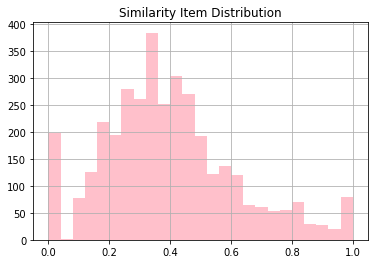

In [21]:
X = renamedata.T
item = renamedata.columns
item_sim = cosine_similarity(X)
item_sim = pd.DataFrame(item_sim, index=item, columns=item)
item_sim = item_sim.unstack().reset_index()
item_sim.columns = ['item1','item2','sim']
item_sim['sim'].hist(bins=25 , color ='Pink')
plt.title('Similarity Item Distribution');


In [22]:
# set threshold = 0.60
threshold = 0.60
sim_df = item_sim[item_sim.apply(lambda x: x['item1']!=x['item2'], axis=1) & item_sim['sim'].between(threshold, 1)]
sim_df.sort_values('sim', ascending=False)

,item1,item2,sim
2731,โรตี,กระเป๋า,0.976467
2732,โรตี,ชาบู,0.976467
3585,ครีมกันแดด,โรตี,0.976467
1965,ชาบู,โรตี,0.976467
1905,กระเป๋า,โรตี,0.976467
...,...,...,...
924,แสงโสม,หมูแดดเดียว,0.600245
173,Brownie อวกาศ,ข้าวขาหมูคากิคาจักออนไลน์,0.600000
3173,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,0.600000
3182,ข้าวขาหมูคากิคาจักออนไลน์,Brownie อวกาศ,0.600000


# Matrix Factorization

In [23]:
from sklearn.decomposition import NMF

# X = df.drop(['ครีมกันแดด','กระเป๋า','ชาบู'],axis=1) # remove items that all users use
X = renamedata
n_factors = 12

nmf = NMF(n_factors, random_state=48)
W = nmf.fit_transform(X)
H = nmf.components_
print(f'Reconstruction error: {nmf.reconstruction_err_}')

# reconstruct rating matrix -> recommendation 
rec_df = pd.DataFrame(W @ H, columns=X.columns, index=X.index)
rec_df.head()

Reconstruction error: 12.611941986919286


C:\Users\User\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\User\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
student,,,,,,,,,,,,,,,,,,,,,
0,0.394292,0.831138,0.048992,0.740622,0.160530,0.054643,0.000000,0.466167,0.181781,0.404105,...,0.634127,0.238191,0.054988,0.133892,0.977975,0.928970,0.231556,0.893330,0.162265,1.019261
1,0.788153,0.421349,0.035953,0.012575,0.063460,0.000000,0.027237,0.794369,0.700737,0.326702,...,0.981214,0.000000,0.116362,0.101403,0.028777,0.763271,0.004191,0.894071,1.108080,1.085786
2,0.022982,0.057506,0.259665,0.937704,0.039873,0.918079,0.052201,0.419106,0.057307,0.055890,...,0.106805,0.109194,0.051000,0.049349,0.000000,0.253395,0.102526,0.082327,0.178396,0.982970
3,0.275296,0.841802,0.057355,0.101583,0.861547,0.026922,0.026880,0.000000,0.342550,0.001560,...,0.113225,0.162104,0.330111,0.024117,0.000000,1.060804,0.163250,1.040542,0.979626,0.938692
4,0.523271,0.873507,0.031618,0.250417,0.030589,0.021970,0.046282,0.648101,0.260706,0.287308,...,0.933476,0.000000,0.110822,0.084549,0.070144,0.791771,0.003992,0.182940,0.650650,0.888658


In [24]:
rating_df = renamedata.reset_index().melt(id_vars='student') \
    .merge(rec_df.reset_index().melt(id_vars='student'), left_on=['student','variable'], right_on=['student','variable']) \
    .rename({'variable':'item', 'value_x' : 'r', 'value_y' : 'r_pred' }, axis=1) 
rating_df

,student,item,r,r_pred
0,0,จักรยานเสือภูเขา,0,0.394292
1,1,จักรยานเสือภูเขา,1,0.788153
2,2,จักรยานเสือภูเขา,0,0.022982
3,3,จักรยานเสือภูเขา,0,0.275296
4,4,จักรยานเสือภูเขา,1,0.523271
...,...,...,...,...
2575,38,ครีมกันแดด,1,0.875982
2576,39,ครีมกันแดด,1,1.034627
2577,40,ครีมกันแดด,1,0.840331
2578,41,ครีมกันแดด,1,1.172428


# Recommended item for each user

In [25]:
# recommendation is the not-purchased items with the highest predicted rating
rec_items = rating_df[rating_df['r']==0].sort_values(['student','r_pred'], ascending=False).groupby('student').nth(0)
rec_items

,item,r,r_pred
student,,,
0,เนื้อย่าง,0,0.612897
1,เครื่องดูดฝุ่นอัตโนมัติ (robot),0,0.949863
2,drone,0,0.458082
3,เสื้อซีทรู,0,0.499317
4,Software ถูกลิขสิทธิ์,0,0.650650
5,กรรไกรตัดขนจมูก,0,0.506642
6,กรรไกรตัดขนจมูก,0,0.522434
7,จักรยานเสือภูเขา,0,0.653063
8,ตาชั่ง,0,0.500460
